In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE164378.h5ad")
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad')
print('Original adata:', adata.shape)

adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')
label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')


Original adata: (161764, 33538)
all cell types: ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


In [3]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Phase,Batch,donor,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,G1,Batch1,P2,7535,217,10823,2915
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,G1,Batch1,P1,6013,209,5864,1617
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,S,Batch1,P4,6620,213,5067,1381
L1_AAACCCACACGTACTA,NK,NK,NK_2,G1,Batch1,P3,3567,202,4786,1890
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,G1,Batch1,P4,6402,215,6505,1621


## Read annotation result from SingleR

In [4]:
!ls

L1_confusion_matrix.ipynb     SingleR_pred_label_fine.RData
Pred_Hao_fine.csv             SingleR_pred_label_main.RData
Pred_Hao_main.csv             tutorial.r
SingleR_Monaco_ref.r


In [19]:
pred_main = pd.read_csv('Pred_Hao_main.csv', index_col=0)
pred_main.head()

,scores.B.cells,scores.Basophils,scores.CD4..T.cells,scores.CD8..T.cells,scores.Dendritic.cells,scores.Monocytes,scores.Neutrophils,scores.NK.cells,scores.Progenitors,scores.T.cells,labels,delta.next,pruned.labels
L1_AAACCCAAGAAACTCA,0.354808,0.274318,0.168602,0.167421,0.523336,0.542873,0.372712,0.247742,0.325546,0.189521,Monocytes,0.144641,Monocytes
L1_AAACCCAAGACATACA,0.202864,0.175306,0.347140,0.328412,0.192140,0.191440,0.121734,0.279285,0.189424,0.320435,CD4+ T cells,0.082839,CD4+ T cells
L1_AAACCCACAACTGGTT,0.183886,0.127872,0.307215,0.321246,0.160725,0.152241,0.070035,0.245911,0.170120,0.291964,CD8+ T cells,0.067645,CD8+ T cells
L1_AAACCCACACGTACTA,0.215920,0.194289,0.303123,0.370944,0.214716,0.269439,0.177739,0.427986,0.238592,0.399893,NK cells,0.194716,NK cells
L1_AAACCCACAGCATACT,0.197089,0.151988,0.317750,0.328642,0.190152,0.195460,0.123325,0.277845,0.213959,0.303645,CD8+ T cells,0.059287,CD8+ T cells


In [20]:
pred_types_main = np.unique(pred_main['labels']).tolist()
pred_types_main

['B cells',
 'Basophils',
 'CD4+ T cells',
 'CD8+ T cells',
 'Dendritic cells',
 'Monocytes',
 'NK cells',
 'Neutrophils',
 'Progenitors',
 'T cells']

In [21]:
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [25]:
type_reference = {'B cells': 'B', 
                  'CD4+ T cells': 'CD4_T', 
                  'CD8+ T cells': 'CD8_T', 
                  'Dendritic cells': 'DC', 
                  'Monocytes': 'Mono', 
                  'NK cells': 'NK', 
                  'T cells': 'other_T'}

for cell in pred_main.index:
    if pred_main.loc[cell, 'labels'] in type_reference:
        pred_main.loc[cell, 'labels'] = type_reference[pred_main.loc[cell, 'labels']]

In [26]:
pred_main.head()

,scores.B.cells,scores.Basophils,scores.CD4..T.cells,scores.CD8..T.cells,scores.Dendritic.cells,scores.Monocytes,scores.Neutrophils,scores.NK.cells,scores.Progenitors,scores.T.cells,labels,delta.next,pruned.labels
L1_AAACCCAAGAAACTCA,0.354808,0.274318,0.168602,0.167421,0.523336,0.542873,0.372712,0.247742,0.325546,0.189521,Mono,0.144641,Monocytes
L1_AAACCCAAGACATACA,0.202864,0.175306,0.347140,0.328412,0.192140,0.191440,0.121734,0.279285,0.189424,0.320435,CD4_T,0.082839,CD4+ T cells
L1_AAACCCACAACTGGTT,0.183886,0.127872,0.307215,0.321246,0.160725,0.152241,0.070035,0.245911,0.170120,0.291964,CD8_T,0.067645,CD8+ T cells
L1_AAACCCACACGTACTA,0.215920,0.194289,0.303123,0.370944,0.214716,0.269439,0.177739,0.427986,0.238592,0.399893,NK,0.194716,NK cells
L1_AAACCCACAGCATACT,0.197089,0.151988,0.317750,0.328642,0.190152,0.195460,0.123325,0.277845,0.213959,0.303645,CD8_T,0.059287,CD8+ T cells


In [27]:
np.unique(pred_main['labels']).tolist()

['B',
 'Basophils',
 'CD4_T',
 'CD8_T',
 'DC',
 'Mono',
 'NK',
 'Neutrophils',
 'Progenitors',
 'other_T']

In [53]:
import pandas as pd

# Get the true labels
true_labels = adata.obs['celltype.l1']

# Get the predicted labels
predicted_labels = pred_main['labels']

# Create the confusion matrix
cm = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['Predicted'], margins=False)

In [35]:
cm

Predicted,B,Basophils,CD4_T,CD8_T,DC,Mono,NK,Neutrophils,Progenitors,other_T
True,,,,,,,,,,
B,13689,0,0,1,9,20,66,0,2,13
CD4_T,3,0,30931,1078,7,20,296,0,0,8666
CD8_T,0,0,639,10770,4,4,2815,0,0,11237
DC,0,0,0,0,3442,147,0,0,0,0
Mono,0,0,0,0,327,48678,3,2,0,0
NK,0,0,7,3,0,2,18502,0,0,150
other,8,9,64,24,63,1300,194,0,1697,83
other_T,0,0,110,217,0,2,898,0,0,5562


In [54]:
# reorder rows
cm = cm.reindex(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other_T', 'other'], axis=0)
# reorder columns
cm = cm.reindex(['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other_T', 'Basophils', 'Neutrophils', 'Progenitors'], axis=1)
cm

Predicted,B,CD4_T,CD8_T,DC,Mono,NK,other_T,Basophils,Neutrophils,Progenitors
True,,,,,,,,,,
B,13689,0,1,9,20,66,13,0,0,2
CD4_T,3,30931,1078,7,20,296,8666,0,0,0
CD8_T,0,639,10770,4,4,2815,11237,0,0,0
DC,0,0,0,3442,147,0,0,0,0,0
Mono,0,0,0,327,48678,3,0,0,2,0
NK,0,7,3,0,2,18502,150,0,0,0
other_T,0,110,217,0,2,898,5562,0,0,0
other,8,64,24,63,1300,194,83,9,0,1697


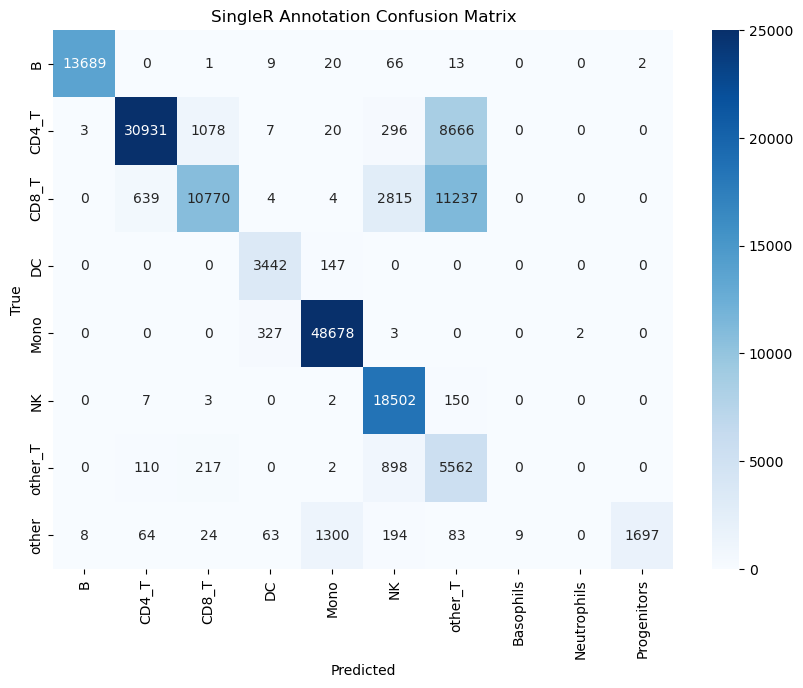

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmax=25000)
plt.title('SingleR Annotation Confusion Matrix')
plt.show()

In [56]:
row_sum = cm.sum(axis=1)
row_sum


True
B          13800
CD4_T      41001
CD8_T      25469
DC          3589
Mono       49010
NK         18664
other_T     6789
other       3442
dtype: int64

In [58]:
cm_proportion

Predicted,B,CD4_T,CD8_T,DC,Mono,NK,other_T,Basophils,Neutrophils,Progenitors
True,,,,,,,,,,
B,99.195652,0.000000,0.007246,0.065217,0.144928,0.478261,0.094203,0.000000,0.000000,0.014493
CD4_T,0.007317,75.439623,2.629204,0.017073,0.048779,0.721934,21.136070,0.000000,0.000000,0.000000
CD8_T,0.000000,2.508932,42.286701,0.015705,0.015705,11.052652,44.120303,0.000000,0.000000,0.000000
DC,0.000000,0.000000,0.000000,95.904152,4.095848,0.000000,0.000000,0.000000,0.000000,0.000000
Mono,0.000000,0.000000,0.000000,0.667211,99.322587,0.006121,0.000000,0.000000,0.004081,0.000000
NK,0.000000,0.037505,0.016074,0.000000,0.010716,99.132019,0.803686,0.000000,0.000000,0.000000
other_T,0.000000,1.620268,3.196347,0.000000,0.029459,13.227279,81.926646,0.000000,0.000000,0.000000
other,0.232423,1.859384,0.697269,1.830331,37.768739,5.636258,2.411389,0.261476,0.000000,49.302731


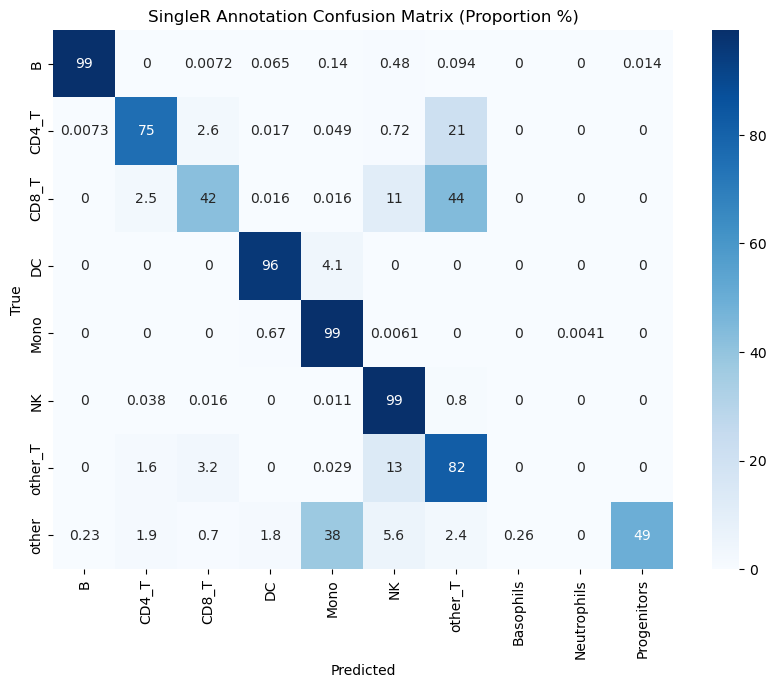

In [59]:
cm_proportion = cm.div(row_sum, axis=0)
cm_proportion *= 100
plt.figure(figsize=(10, 7))
sns.heatmap(cm_proportion, annot=True, cmap='Blues')
plt.title('SingleR Annotation Confusion Matrix (Proportion %)')
plt.show()